In [2]:
from vnstock import Listing, Quote, Company, Finance, Trading, Screener

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
import requests
import json

def fetch_industry_map():
    url = 'https://api-finfo.vndirect.com.vn/v4/industry_classification'
    params = {'q': 'industryLevel:2'}
    headers = {'User-Agent': 'Mozilla/5.0'}  # User-Agent đơn giản là đủ

    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        data_industry = response.json()

        industry_map = {}
        for industry in data_industry.get('data', []):
            industry_name = industry.get('vietnameseName', '')
            code_list_str = industry.get('codeList', '')
            codes = [code.strip() for code in code_list_str.split(',') if code.strip()]
            for code in codes:
                industry_map[code] = industry_name

        return industry_map
    except requests.exceptions.RequestException as e:
        print(f"Lỗi khi tải dữ liệu ngành: {e}")
        return {}

In [5]:
ticket = input("Enter stock ticker: ").upper()
print(f"Mã cổ phiếu {ticket}...")

while True:
    try:
        grow = float(input("Kỳ vọng tăng trưởng lợi nhuận so với quý trước: "))
        break  # Thoát khỏi vòng lặp nếu nhập thành công
    except ValueError:ticket = input("Enter stock ticker: ").upper()
    print(f"Mã cổ phiếu {ticket}...")
    
    while True:
        try:
            grow = float(input("Kỳ vọng tăng trưởng lợi nhuận so với quý trước: "))
            break  # Thoát khỏi vòng lặp nếu nhập thành công
        except ValueError:
            print("Giá trị không hợp lệ. Vui lòng nhập một số.")
print(f"Giá trị grow đã nhập: {grow}%")



Mã cổ phiếu HPG...
Giá trị grow đã nhập: 10.0%


In [6]:
finance = Finance(symbol=ticket, source='VCI')
quote = Quote(symbol=ticket)
enddate = datetime.now().strftime('%Y-%m-%d')
ohlc = quote.history(start='2018-01-01', end= enddate, interval='1D')
ohlc.head()

,time,open,high,low,close,volume
0,2018-01-02,8.89,9.05,8.80,9.04,4105100
1,2018-01-03,9.09,9.19,8.96,9.02,4828220
2,2018-01-04,9.06,9.17,9.02,9.13,4640280
3,2018-01-05,9.11,9.18,9.03,9.09,3660450
4,2018-01-08,9.04,9.38,9.00,9.38,3702750


In [7]:
ohlc['Năm'] = ohlc['time'].dt.year
ohlc['Kỳ'] = ohlc['time'].dt.quarter
ohlc.tail()


,time,open,high,low,close,volume,Năm,Kỳ
1919,2025-09-11,28.70,29.20,28.00,29.15,71781900,2025,3
1920,2025-09-12,29.20,30.10,29.15,30.00,104621000,2025,3
1921,2025-09-15,30.25,30.85,30.10,30.35,88920500,2025,3
1922,2025-09-16,30.55,30.55,29.75,29.95,66855600,2025,3
1923,2025-09-17,29.90,30.25,29.85,29.95,30216200,2025,3


In [12]:
df_ratio = finance.ratio(period='quarter', lang='vi', dropna=True).droplevel(0, axis=1)
df_ratio = df_ratio[['Năm','Kỳ','EPS (VND)','Vốn hóa (Tỷ đồng)']].set_index('Năm')
df_ratio.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
CP,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,...,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG
Năm,2025,2025,2024,2024,2024,2024,2023,2023,2023,2023,...,2015,2015,2014,2014,2014,2014,2013,2013,2013,2013
Kỳ,2,1,4,3,2,1,4,3,2,1,...,2,1,4,3,2,1,4,3,2,1
(Vay NH+DH)/VCSH,0.991477,0.985606,0.959843,0.923392,0.85267,0.886144,0.7369,0.668168,0.710259,0.735854,...,0.0,0.0,0.657742,0.70296,0.710334,0.854445,0.990198,1.011834,0.932483,0.88176
Nợ/VCSH,0.979614,0.939556,0.958087,0.891108,0.901137,0.911868,0.826032,0.737412,0.800969,0.818875,...,0.0,0.0,0.858238,0.821939,0.904911,1.091883,1.41989,1.414025,1.28364,1.124885
TSCĐ / Vốn CSH,0.533698,0.727461,0.588137,0.612598,0.644285,0.672344,0.700282,0.728805,0.704411,0.725289,...,0.640278,0.750191,0.771094,0.773979,0.853075,0.887926,0.967294,0.99401,0.950783,0.856587
Vốn CSH/Vốn điều lệ,1.594164,1.537325,1.493687,1.456317,1.415895,1.376133,1.339807,1.301096,1.274975,1.256445,...,0.170795,0.161021,0.154737,0.149504,0.138341,0.134317,0.123742,0.118632,0.117625,0.117682
Vòng quay tài sản,0.626176,0.668503,0.673609,0.687111,0.692487,0.66651,0.664323,0.634915,0.657497,0.67263,...,0.0,0.0,1.130303,1.181102,1.090257,0.974523,0.899659,0.816782,0.860766,0.910482
Vòng quay TSCĐ,1.978496,1.996491,1.9918,1.971378,1.865096,1.730895,1.665644,1.563145,1.648884,1.754513,...,0.0,0.0,2.782774,2.800802,2.617461,2.392196,2.338401,2.060507,2.238952,2.4665
Số ngày thu tiền bình quân,16.025118,14.720558,13.60541,16.210015,16.21528,16.295421,13.743729,13.164471,11.967368,11.508428,...,0.0,0.0,17.916284,13.529387,16.477062,18.68119,23.219637,22.786274,24.002683,25.465824


In [14]:

finance = Finance(symbol='HSG', source='VCI')
df_balance_sheet = finance.balance_sheet(period='year', lang='vi', dropna=True)

df_balance_sheet.columns

Index(['CP', 'Năm', 'TÀI SẢN NGẮN HẠN (đồng)',
       'Tiền và tương đương tiền (đồng)',
       'Giá trị thuần đầu tư ngắn hạn (đồng)',
       'Các khoản phải thu ngắn hạn (đồng)', 'Hàng tồn kho ròng',
       'Tài sản lưu động khác', 'TÀI SẢN DÀI HẠN (đồng)',
       'Phải thu về cho vay dài hạn (đồng)', 'Tài sản cố định (đồng)',
       'Đầu tư dài hạn (đồng)', 'Tài sản dài hạn khác',
       'TỔNG CỘNG TÀI SẢN (đồng)', 'NỢ PHẢI TRẢ (đồng)', 'Nợ ngắn hạn (đồng)',
       'Nợ dài hạn (đồng)', 'VỐN CHỦ SỞ HỮU (đồng)', 'Vốn và các quỹ (đồng)',
       'Lãi chưa phân phối (đồng)', 'LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ',
       'TỔNG CỘNG NGUỒN VỐN (đồng)', 'Trả trước cho người bán ngắn hạn (đồng)',
       'Phải thu về cho vay ngắn hạn (đồng)', 'Hàng tồn kho, ròng (đồng)',
       'Tài sản lưu động khác (đồng)', 'Quỹ đầu tư và phát triển (đồng)',
       'Cổ phiếu phổ thông (đồng)', 'Vốn góp của chủ sở hữu (đồng)',
       'Vay và nợ thuê tài chính dài hạn (đồng)',
       'Người mua trả tiền trước ngắn hạ

In [557]:
df = pd.merge(ohlc, df_ratio, on=['Năm', 'Kỳ'], how='left')
df.set_index('time', inplace=True)
df.sort_index(ascending=False, inplace=True)

In [ ]:
Fill_values = df['EPS (VND)'].fillna(method='bfill')*(1+(grow/100))

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


In [560]:
df['EPS (VND)'] = df['EPS (VND)'].fillna(Fill_values)
df['PEflex'] = df['close'] * 1000 / df['EPS (VND)']

color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.


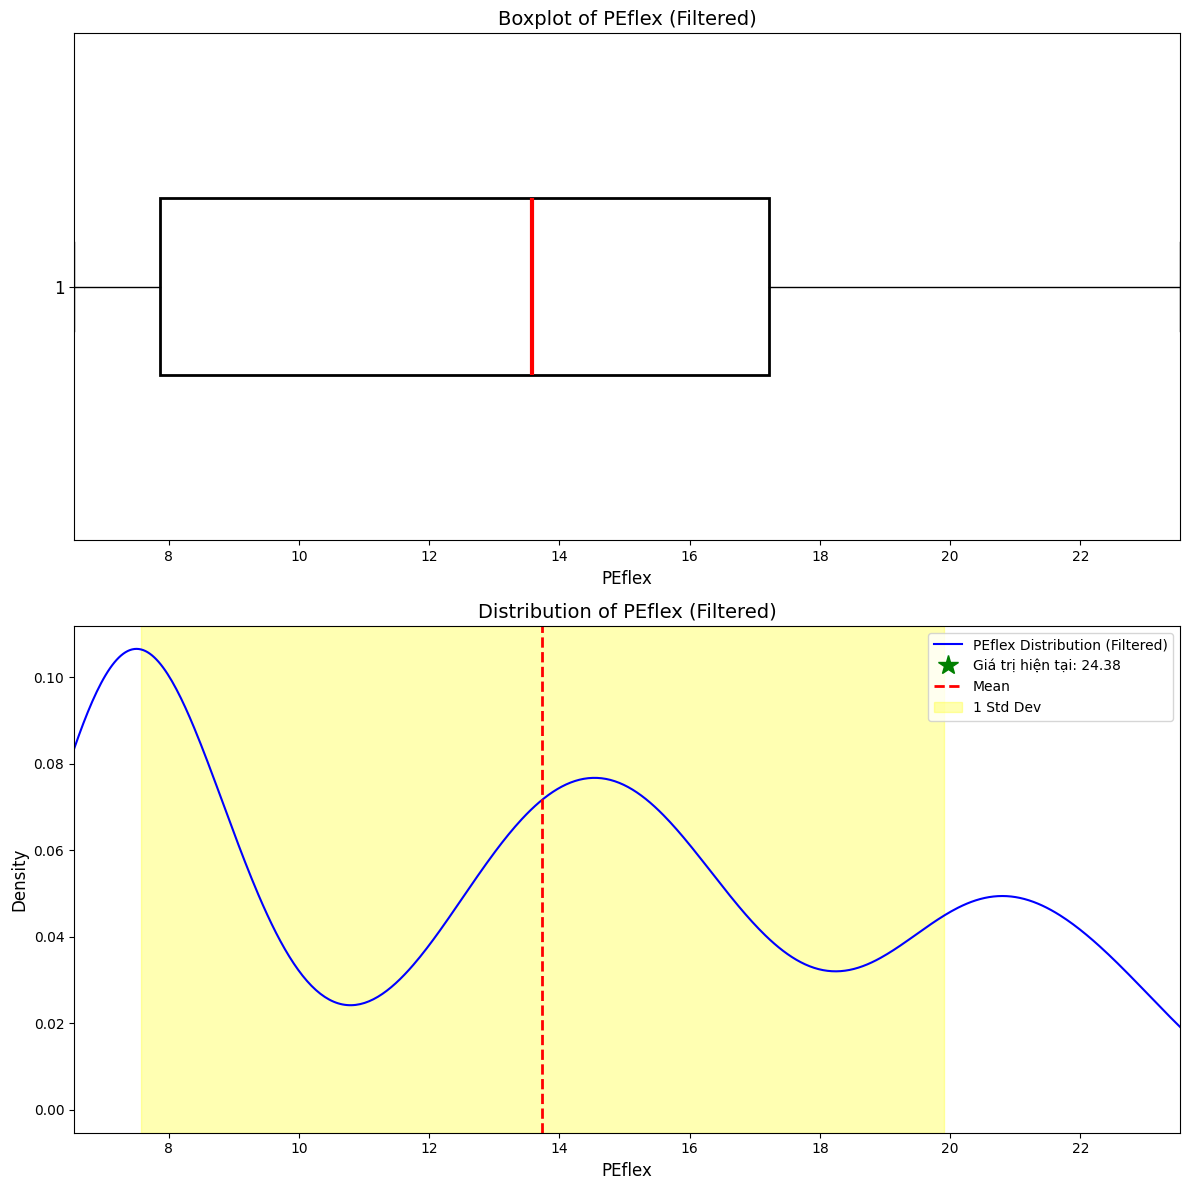

In [563]:
import matplotlib.pyplot as plt

# Lọc dữ liệu trong khoảng từ q10 đến q90 (2 đầu của boxplot)
# Calculate the 10th and 90th percentiles
mean = df['PEflex'].mean()
std = df['PEflex'].std()
q10 = df['PEflex'].quantile(0.05)
q90 = df['PEflex'].quantile(0.95)
current_value = df['PEflex'].iloc[1]  # Giá trị hiện tại

filtered_data = df[(df['PEflex'] >= q10) & (df['PEflex'] <= q90)]

# Vẽ đồ thị boxplot
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(current_value, 1, 'r*', markersize=15, label=f'Giá trị hiện tại: {current_value:.2f}', color = 'green')
boxprops = dict(facecolor='white', linewidth=2)  # Định nghĩa nét box màu xanh và dày hơn
medianprops = dict(color='red', linewidth=3)  # Định nghĩa nét median màu đỏ và dày hơn
plt.boxplot(filtered_data['PEflex'], vert=False, patch_artist=True, boxprops=boxprops, medianprops=medianprops, widths=0.35)
plt.title('Boxplot of PEflex (Filtered)', fontsize=14)
plt.xlabel('PEflex', fontsize=12)
plt.tick_params(axis='y', labelsize=12)  # Tăng kích thước trụ Y
plt.xlim(q10, q90)  # Giới hạn trục x tương ứng với khoảng lọc

# Vẽ đồ thị phân phối
plt.subplot(2, 1, 2)
filtered_data['PEflex'].plot(kind='kde', color='blue', label='PEflex Distribution (Filtered)')
plt.plot(current_value, 0.03, 'r*', markersize=15, label=f'Giá trị hiện tại: {current_value:.2f}', color = 'green')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvspan(mean - std, mean + std, color='yellow', alpha=0.3, label='1 Std Dev')
plt.title('Distribution of PEflex (Filtered)', fontsize=14)
plt.xlabel('PEflex', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.xlim(q10, q90)  # Giới hạn trục x tương ứng với khoảng lọc
plt.tight_layout()
plt.show()

In [570]:
target1 = df['PEflex'].quantile(0.5)* df['EPS (VND)'].iloc[1]
target2 = df['PEflex'].quantile(0.7)* df['EPS (VND)'].iloc[1]
target3 = df['PEflex'].quantile(0.8)  * df['EPS (VND)'].iloc[1]
target4 = (mean + 1 * std)  * df['EPS (VND)'].iloc[1]
target1,target2,target3,target4


(np.float64(15475.344052249397),
 np.float64(18833.006989746813),
 np.float64(22892.63763899147),
 np.float64(22694.11688966741))

In [28]:
industry_map = fetch_industry_map()

if ticket in industry_map:
    print(f"{ticket} thuộc ngành: {industry_map[ticket]}")
else:
    print(f"{ticket} không tìm thấy trong fetch_industry_map.")

HPG thuộc ngành: Tài nguyên


In [10]:
data = df[['CP','Kỳ','Nợ/VCSH','ROE (%)','ROA (%)']]
data.head(5)

NameError: name 'df' is not defined

In [80]:
df = df.iloc[1:].reset_index(drop=True)
df.head()


Meta          Chỉ tiêu cơ cấu nguồn vốn                           \
    CP   Năm Kỳ          (Vay NH+DH)/VCSH   Nợ/VCSH TSCĐ / Vốn CSH   
0  HPG  2023  1                  0.735854  0.818875       0.725289   
1  HPG  2022  4                  0.718446  0.772243       0.736976   
2  HPG  2022  3                  0.796632  0.874119       0.731322   
3  HPG  2022  2                  0.835326  1.076723       0.701187   
4  HPG  2022  1                  0.748853  0.878041       0.709539   

                      Chỉ tiêu hiệu quả hoạt động                 \
  Vốn CSH/Vốn điều lệ           Vòng quay tài sản Vòng quay TSCĐ   
0            1.256445                    0.672630       1.754513   
1            1.252210                    0.811363       2.018492   
2            1.277779                    0.848809       2.279502   
3            1.301750                    0.883729       2.374617   
4            1.289276                    0.930868       2.361626   

                              ... Chỉ tiêu thanh khoản Chỉ tiêu định giá  \
  Số ngày thu tiền bình quân  ...    Đòn bẩy tài chính Vốn hóa (Tỷ đồng)   
0                  11.508428  ...             1.818875   156999213900000   
1                  10.236472  ...             1.772243   120075324705000   
2                  11.013248  ...             1.874119   116004974715000   
3                  12.848034  ...             2.076723   113388321150000   
4                  12.411658  ...             1.878041   129669721110000   

                                                                         \
  Số CP lưu hành (Triệu CP)         P/E       P/B       P/S P/Cash Flow   
0                5814785700  236.427696  1.629519  1.266737   58.108925   
1                5814785700   14.153967  1.250689  0.849133    9.780003   
2                5814785700    6.479819  1.184168  0.723700    5.544215   
3                5814785700    3.776039  1.136251  0.687766    6.954686   
4                5814785700    3.630420  1.312271  0.797668    3.784893   

                                         
     EPS (VND)    BVPS (VND)  EV/EBITDA  
0    68.359746  16569.302745  18.227794  
1  -342.497317  16510.905547   8.755877  
2  -305.107309  16847.272184   5.648838  
3   693.444698  17161.695448   3.996282  
4  1413.114908  16993.446267   3.742167  

[5 rows x 37 columns]

In [50]:
data = df[['CP','Kỳ','Giá trị thuần đầu tư ngắn hạn (đồng)']]
data.head(5)

,CP,Kỳ,Giá trị thuần đầu tư ngắn hạn (đồng)
Năm,,,
2025,HPG,2,17584027436423
2025,HPG,1,16212510112252
2024,HPG,4,18974716730905
2024,HPG,3,16386803148945
2024,HPG,2,15314673148945


In [173]:
df_finance = finance.ratio(period='quarter', lang='vi', dropna=True).droplevel(0, axis=1)

In [ ]:
from vnstock import Vnstock
horizone = 'quarter' # 'year' or 'quarter'

company = Vnstock().stock(symbol= ticket, source='VCI').company

,CP,Kỳ,EPS (VND)
Năm,,,
2025,HPG,2,554.557507
2025,HPG,1,435.710973
2024,HPG,4,439.108115
2024,HPG,3,472.612318
2024,HPG,2,518.938915
2024,HPG,1,448.792434
2023,HPG,4,511.244870
2023,HPG,3,344.766805
2023,HPG,2,251.091388


In [125]:
df_finance = finance[['CP','Năm','Kỳ','ROE (%)','ROA (%)','Nợ/VCSH']]

In [342]:
income = finance.income_statement(period='quarter', lang='vi', dropna=True)

In [343]:
income.head(5).T

,0,1,2,3,4
CP,HPG,HPG,HPG,HPG,HPG
Năm,2025,2025,2024,2024,2024
Kỳ,2,1,4,3,2
Tăng trưởng doanh thu (%),-0.091398,0.220569,0.008808,0.192404,0.340166
Doanh thu (đồng),36286185846409,37950635502050,35232197602514,34300352057045,39936268160790
Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),4256487211764,3344284694388,2808645369171,3022946632050,3319263141862
Tăng trưởng lợi nhuận (%),0.282359,0.165017,-0.055212,0.507896,1.273402
Thu nhập tài chính,498183728007,438057240540,700560102056,528453174917,645060096530
Chi phí tiền lãi vay,-439112631420,-627024360692,-562492663846,-525114798901,-564134360513
Doanh thu bán hàng và cung cấp dịch vụ,36286185846409,37950635502050,35232197602514,34300352057045,39936268160790


In [165]:
df_income = income[['CP','Năm','Kỳ','Doanh thu (đồng)','Tăng trưởng lợi nhuận (%)','Lãi gộp','Lợi nhuận thuần']]
df_income['Doanh thu'] = round(df_income['Doanh thu (đồng)']/1e6,0)
df_income['Lãi gộp'] = round(df_income['Lãi gộp']/1e6,0)
df_income['Lợi nhuận thuần'] = round(df_income['Lợi nhuận thuần']/1e6,0)
df_income = df_income.drop(columns=['Doanh thu (đồng)'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [169]:
df_income.head(5)

,CP,Năm,Kỳ,Tăng trưởng lợi nhuận (%),Lãi gộp,Lợi nhuận thuần,Doanh thu
0,HPG,2025,2,0.282359,6589722.0,4264524.0,36286186.0
1,HPG,2025,1,0.165017,5424154.0,3349805.0,37950636.0
2,HPG,2024,4,-0.055212,4364909.0,2809594.0,35232198.0
3,HPG,2024,3,0.507896,4731177.0,3021672.0,34300352.0
4,HPG,2024,2,1.273402,5247480.0,3319575.0,39936268.0


In [206]:
from vnstock import Company
company = Company(symbol='ACB', source='VCI')
company.ratio_summary().T

,0
symbol,ACB
year_report,2025
length_report,2
update_date,1755274051870
revenue,14298695000000
revenue_growth,0.146214
net_profit,4881159000000
net_profit_growth,0.092326
ebit_margin,0
roe,0.201725


In [168]:
df = pd.merge(df_income,df_finance, on=['CP','Năm','Kỳ'], how='left')
df

,CP,Năm,Kỳ,Tăng trưởng lợi nhuận (%),Lãi gộp,Lợi nhuận thuần,Doanh thu,ROE (%),ROA (%),Nợ/VCSH
0,HPG,2025,2,0.282359,6589722.0,4264524.0,36286186.0,0.115504,0.059242,0.979614
1,HPG,2025,1,0.165017,5424154.0,3349805.0,37950636.0,0.110522,0.057360,0.939556
2,HPG,2024,4,-0.055212,4364909.0,2809594.0,35232198.0,0.110732,0.058318,0.958087
3,HPG,2024,3,0.507896,4731177.0,3021672.0,34300352.0,0.113763,0.060346,0.891108
4,HPG,2024,2,1.273402,5247480.0,3319575.0,39936268.0,0.107209,0.058024,0.901137
5,HPG,2024,1,6.221656,4153983.0,2869183.0,31092570.0,0.091736,0.050350,0.911868
6,HPG,2023,4,2.492697,4471610.0,2968971.0,34924568.0,0.068771,0.038172,0.826032
7,HPG,2023,3,2.129985,3594807.0,2000363.0,28765716.0,0.019190,0.010759,0.737412
8,HPG,2023,2,-0.637907,3194987.0,1447825.0,29799498.0,-0.019666,-0.010814,0.800969
9,HPG,2023,1,-0.951625,1676437.0,383230.0,26865449.0,0.006809,0.003604,0.818875
